## Getting Data

One of the first steps for a machine learning project is getting the data! In industry, this can sometimes be more difficult than it sounds. :)

In this section we will review some of the most common ways of accessing data and some sources of data.

### Data Sources

* [Kaggle](https://www.kaggle.com)
* [UCI](https://archive.ics.uci.edu/ml/datasets.html)
* [Awesome Public Data Sets](https://github.com/caesar0301/awesome-public-datasets)
* A website via web scraping
* A website's API

### Reading in CSV files

CSV files are extremely common in machine learning. These files have a row of data per line of the file and each line is a comma-separated list in which each element is a column. Pandas makes it extremely easy to read in these data.

The documentation can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). A few parameters of note:

1. sep - this defaults to a comma, but we can specify anything we want. For example, CSV format is poor if some of your columns contain commas. A better option might be a |.
2. header - which row (if any) have the column names.
3. names - column names to use

If your CSV is well formatted with the first row being the column names, then the default parameters should work well.

In [3]:
import pandas as pd

In [2]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation', 'relationship', 'race',
        'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry', 'label']
train_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                      header=None, names=names)

HTTPError: HTTP Error 403: Forbidden

In [3]:
train_df.head(5)

NameError: name 'train_df' is not defined

### Reading JSON

JSON is also a very popular format as it allows for a more flexible schema. A lot of the data sent around the web is transmitted as JSON. Here is an example:
```text
{
    "glossary": {
        "title": "example glossary",
		"GlossDiv": {
            "title": "S",
			"GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
					"SortAs": "SGML",
					"GlossTerm": "Standard Generalized Markup Language",
					"Acronym": "SGML",
					"Abbrev": "ISO 8879:1986",
					"GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
						"GlossSeeAlso": ["GML", "XML"]
                    },
					"GlossSee": "markup"
                }
            }
        }
    }
}
```
Python can actually quite easily read these data from strings into dictionaries:

In [4]:
import json

In [5]:
json_string = """{
    "glossary": {
        "title": "example glossary",
        "GlossDiv": {
            "title": "S",
            "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                    "SortAs": "SGML",
                    "GlossTerm": "Standard Generalized Markup Language",
                    "Acronym": "SGML",
                    "Abbrev": "ISO 8879:1986",
                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                        "GlossSeeAlso": ["GML", "XML"]
                    },
                    "GlossSee": "markup"
                }
            }
        }
    }
}"""

In [6]:
with open("/Users/tfolkman/Desktop/uci_data.csv", "r") as f:
    json_data = json.load(f)
json_data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tfolkman/Desktop/uci_data.csv'

In [7]:
s = """
{"name": "tyler", "age": 22}
"""
blah = json.loads(s)
blah['name']

'tyler'

In [8]:
json_dict["glossary"]['title']

NameError: name 'json_dict' is not defined

Here is a somewhat more realistic example. Let's say that we have some data on web page: https://www.ncdc.noaa.gov/cag/time-series/global/globe/land_ocean/ytd/12/1880-2016.json

We would like to grab the data directly from the page and put get it into a data frame. First, we need to get the data. The simpliest way is to use the requests package:

In [9]:
import requests

In [10]:
get_request = requests.get("https://www.ncdc.noaa.gov/cag/time-series/global/globe/land_ocean/ytd/12/1880-2016.json")

In [11]:
get_request.text

'{"description":{"title":"Global Land and Ocean Temperature Anomalies, January-December","units":"Degrees Celsius","base_period":"1901-2000","missing":-999},"data":{"1880":"-0.11","1881":"-0.06","1882":"-0.07","1883":"-0.14","1884":"-0.20","1885":"-0.22","1886":"-0.20","1887":"-0.25","1888":"-0.15","1889":"-0.10","1890":"-0.32","1891":"-0.24","1892":"-0.30","1893":"-0.31","1894":"-0.27","1895":"-0.22","1896":"-0.08","1897":"-0.12","1898":"-0.26","1899":"-0.12","1900":"-0.06","1901":"-0.13","1902":"-0.24","1903":"-0.33","1904":"-0.41","1905":"-0.29","1906":"-0.21","1907":"-0.37","1908":"-0.44","1909":"-0.42","1910":"-0.38","1911":"-0.43","1912":"-0.33","1913":"-0.32","1914":"-0.14","1915":"-0.07","1916":"-0.29","1917":"-0.31","1918":"-0.20","1919":"-0.20","1920":"-0.21","1921":"-0.14","1922":"-0.22","1923":"-0.21","1924":"-0.24","1925":"-0.14","1926":"-0.05","1927":"-0.14","1928":"-0.17","1929":"-0.29","1930":"-0.09","1931":"-0.07","1932":"-0.12","1933":"-0.24","1934":"-0.10","1935":"-0

Without going into too much detail, a GET request basically just goes and grabs the data from the page. You can learn some more [here](https://www.w3schools.com/tags/ref_httpmethods.asp). You can then get the raw text with the .text. From there we can load the text using json.loads:

In [12]:
climate_dict = json.loads(get_request.text)

In [13]:
climate_dict.keys()

dict_keys(['description', 'data'])

In [14]:
climate_dict['description']

{'base_period': '1901-2000',
 'missing': -999,
 'title': 'Global Land and Ocean Temperature Anomalies, January-December',
 'units': 'Degrees Celsius'}

In [15]:
series = pd.Series(climate_dict['data'])

In [16]:
series.head()

1880    -0.11
1881    -0.06
1882    -0.07
1883    -0.14
1884    -0.20
dtype: object

Since we just have one column, we use pandas series functionality as opposed to a data frame. Data frames do have the ability to load [from json](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html) and [dictionaries](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.from_dict.html).

### Reading raw files

Sometimes you also just want to parse data line by line yourself. For example, here is a very simple data set of female baby names:

http://deron.meranda.us/data/census-dist-female-first.txt

Perhaps, we just want to extract all of the names which I have saved to a file in the Git repo. In raw Python we can do:

In [17]:
names = []
with open("../small_data/male_names.txt", "r") as f:
    for line in f:
        tokens = line.split(" ")
        names.append(tokens[0])

In [18]:
names[:5]

['JAMES', 'JOHN', 'ROBERT', 'MICHAEL', 'WILLIAM']

In [19]:
from collections import Counter

In [20]:
Counter(names).most_common(10)

[('JAMES', 1),
 ('JOHN', 1),
 ('ROBERT', 1),
 ('MICHAEL', 1),
 ('WILLIAM', 1),
 ('DAVID', 1),
 ('RICHARD', 1),
 ('CHARLES', 1),
 ('JOSEPH', 1),
 ('THOMAS', 1)]

### Getting Data from APIs (GET / POST)

[Here](https://github.com/toddmotto/public-apis) is a decent list of a lot of public APIs. Let's try and hit a few. First off, let's grab some data from the Open Library. Their API page is [here](https://openlibrary.org/developers/api). We will look at grabbing some information regarding the subject "analysis."

In [21]:
subject = "zoo"
api_url = "http://openlibrary.org/subjects/{}.json".format(subject)
analysis_request = requests.get(api_url)
analysis_dict = analysis_request.json()

In [22]:
analysis_dict.keys()

dict_keys(['subject_type', 'name', 'key', 'ebook_count', 'works', 'work_count'])

In [23]:
analysis_dict['ebook_count']

7

A lot of APIs also just take parameters, which you can pass easily with requests. Here is a GET endpoint: https://min-api.cryptocompare.com/data/price?fsym=ETH&tsyms=BTC,USD,EUR

We could just do the string format as above, but a cleaner way is:

In [24]:
base_url = "https://min-api.cryptocompare.com/data/price"
params = {"fsym": "ETH", "tsyms": "BTC,USD,EUR"}
crypto_request = requests.get(base_url, params=params)
print(crypto_request.json())

{'BTC': 0.03314, 'USD': 209.99, 'EUR': 179.84}


Again, the above is a GET request, which for our purposes basically means that you put your parameters in the URL itself. Another type of request is a POST requset. For these requests, you actually send the parameters or data in the body of the request. 

Most public APIs are of the GET sort, but let's use a fake POST endpoint to see how this is done.

In [25]:
endpoint = "http://jsonplaceholder.typicode.com/posts"
data = {"title": 'foo', "body": 'bar', "userId": 1}
response = requests.post(endpoint, json=data)
response.json()

{'body': 'bar', 'id': 101, 'title': 'foo', 'userId': 1}

### Web Scraping

Another way to get data from the web is scraping it. Scraping data, though, should be a last resort because if the format of the website ever changes, all your hard work will be broken. Also, make sure to check websites' terms of use to understand if scraping is allowed and at what rate. If you just let your program loose on a webpage to scrape the data without some sort of limiting, it could hurt the performance of the site. So be kind and make sure to limit yourself to something reasonable. Let's see a quick example. Note: web scraping could be a class in itself. It can require a careful study of a website and clever code to extract all you need.

Here are some more resources:

* http://web.stanford.edu/~zlotnick/TextAsData/Web_Scraping_with_Beautiful_Soup.html
* https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [26]:
from bs4 import BeautifulSoup

In [27]:
site_text = requests.get("https://en.wikipedia.org/wiki/Machine_learning").text
soup = BeautifulSoup(site_text, 'html.parser')

In [28]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Machine learning - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":860184347,"wgRevisionId":860184347,"wgArticleId":233488,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Lists having no precise inclusion criteria from April 2018","All lists having no precise inclusion criteria","All articles with unsourced statements","Articles with unsourced statements from August 2017","Machine learning","Cybernetics","Learning"],"wgBreakFrames":false,"wgPageContentLanguag

In [29]:
toc = soup.find("div", id="toc")
print(toc.text[:100])

Contents

1 Overview

1.1 Machine learning tasks
1.2 Machine learning applications


2 History and r


In [31]:
topic_list = [a.text for a in toc.find_all('a')]

In [32]:
topic_list

['1 Overview',
 '1.1 Types of problems and tasks',
 '2 History and relationships to other fields',
 '2.1 Relation to statistics',
 '3 Theory',
 '4 Approaches',
 '4.1 Decision tree learning',
 '4.2 Association rule learning',
 '4.3 Artificial neural networks',
 '4.4 Deep learning',
 '4.5 Inductive logic programming',
 '4.6 Support vector machines',
 '4.7 Clustering',
 '4.8 Bayesian networks',
 '4.9 Reinforcement learning',
 '4.10 Representation learning',
 '4.11 Similarity and metric learning',
 '4.12 Sparse dictionary learning',
 '4.13 Genetic algorithms',
 '4.14 Rule-based machine learning',
 '4.14.1 Learning classifier systems',
 '5 Applications',
 '6 Model assessments',
 '7 Ethics',
 '8 Software',
 '8.1 Free and open-source software',
 '8.2 Proprietary software with free and open-source editions',
 '8.3 Proprietary software',
 '9 Journals',
 '10 Conferences',
 '11 See also',
 '12 References',
 '13 Further reading',
 '14 External links']

If you plan on scraping the contents from many pages in a loop, an easy way to limit yourself is to use sleep after every page.

In [33]:
import time

In [34]:
## sleep 1 second
time.sleep(1)

### SQL

SQL is an extremely common format for data. Often in industry the data you want to have access to sits in a SQL database. There are entire courses on SQL and hundreds of books, so we will hardly even mention the basics. Some places to look for more information:

* http://downloads.bensresearch.com/SQL.pdf
* https://www.kdnuggets.com/2016/06/seven-steps-mastering-sql-data-science.html

In our example we will use a SQLite database downloaded from here:

https://www.kaggle.com/harsha547/ipldatabase

This database contains data from the Indian Premiere League.

SQLite is also useful for our purposes because the database sits in a single file. Other popular SQL databases are PostgreSQL and MYSQL. 

For this code to work, please download the database from the link above and put it into a directory called large_data (this directory is ignored by git).

In [35]:
import sqlite3
import pandas as pd

In [36]:
conn = sqlite3.connect("../large_data/database.sqlite")
head_df = pd.read_sql_query("select * from Player limit 10;", conn)
head_df

OperationalError: unable to open database file

In [37]:
pd.read_sql_query("""select *, max(Bowling_skill) from Player""", conn)

NameError: name 'conn' is not defined

In [38]:
pd.read_sql_query("""select match_id, avg(Runs_Scored) from Batsman_Scored
                    group by match_id 
                    order by match_id
                    limit 5""", conn)

ERROR: An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 27))



NameError: name 'conn' is not defined

You can also [join tables](https://www.w3schools.com/sql/sql_join.asp) in many ways. Here is one example:

In [39]:
pd.read_sql_query("""select a.*, b.Batting_hand from Player as a
                    left join Batting_style as b
                    on a.Batting_hand == b.Batting_id
                    limit 5""", conn)

ERROR: An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 27))



NameError: name 'conn' is not defined

## Cleaning Data

A good place to start is just looking at your data using some pandas functions to better understand what issues there might be. Describe will give you counts and some statistics for continuous variables.

In [40]:
train_df.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


To see all your columns and their types:

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry    32561 non-null object
label            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


You can then also look at unique values for each column:

In [42]:
train_df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

You can also check to see which columns have missing data:

In [43]:
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

### Missing Data

So you have read in your data only to discover that some values are missing! What do you do? 

First, you should try to understand why your data are missing. Are they missing at **random** or missing **not at random**. Data that are missing at random might be comfortably removed with a large enough dataset. If your data are missing for a reason, perhaps missing actually means zero? Or it is a strong signal of a sensor malfunction? These non-random missing values then should try and be either fixed or leveraged. For example, set them to zero if they should actually be zero. 

Second, you should consider how much data you have relative to how many rows have missing data. If you have 1 million data points with 10 missing at random, you are probably okay to just drop those rows. On the other hand, if you have 300 data points with 100 missing, you should probably be hesitant about removing 1/3 of your data. So assuming you can't find an underlying reason for the missing data, how do you handle them?

The first place you should start is the assumptions of your model. We have yet to discuss models, but for now, just know that some models - such as tree-based algorithms - can actually take missing values without much of an issue. Other models, such as a linear regression, need to have a value filled in that seems plausible. There are a few ways to fill in missing values.

1. Fill in a column's missing values with a statistical value such as the mean, median, or mode. This has the advantage of being very simple and easy to do, but also introduces a smaller variance within your column than otherwise would be present. And high variance within a column is usually beneficial (assuming it is real) to a machine learning model. Also, it might not make a lot of sense. For example, imagine a dataset of heights and weights with missing weights. You then fill all the missing weights with the average regardless of height. We know that height and weight are correlated, but we are not taking advantage of that knowledge.
2. Use a model to learn values that seem reasonable for missing values. Basically, leverage the data that is not missing to learn what the missing variable might be. In our height and weight example, you could use height to predict weight when not missing and then apply that model to heights with missing weights to fill in your missing data. A popular algorithm for this is K-Nearest Neighbors.

For some more ideas on how to deal with missing data, take a look at this article:

https://www.linkedin.com/pulse/imputing-missing-data-playing-fire-jehan-gonsal/

Let's see a simple example of [1]:

In [44]:
import numpy as np

In [45]:
pd_series = pd.Series([5, 10, np.nan, 15, 20, np.nan, 25, 50, np.nan])

In [46]:
pd_series

0     5.0
1    10.0
2     NaN
3    15.0
4    20.0
5     NaN
6    25.0
7    50.0
8     NaN
dtype: float64

In [47]:
pd_series.fillna(pd_series.mean())

0     5.000000
1    10.000000
2    20.833333
3    15.000000
4    20.000000
5    20.833333
6    25.000000
7    50.000000
8    20.833333
dtype: float64

You can also drop the missing rows

In [48]:
pd_series.dropna()

0     5.0
1    10.0
3    15.0
4    20.0
6    25.0
7    50.0
dtype: float64

Or detect them:

In [49]:
pd_series.isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8     True
dtype: bool

### Outliers

Another area of cleaning can be dealing with outliers. First off, how do you define an outlier? This can require domain knowledge as well as other information, but a simple way to start is by taking a look at box plots:

In [50]:
## shows graphs inline
%matplotlib inline

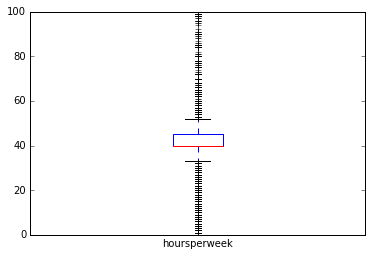

In [51]:
bbox = train_df['hoursperweek'].plot(kind="box")

Here anything outside the whiskers (1.5 times the inter quartile range, 25% - 75%) would be considered an outlier. An example of how to get the cut-off values:

In [52]:
q_df = train_df.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
0.25,28.0,117827.0,9.0,0.0,0.0,40.0
0.75,48.0,237051.0,12.0,0.0,0.0,45.0
iqr,20.0,119224.0,3.0,0.0,0.0,5.0
whisker_length,30.0,178836.0,4.5,0.0,0.0,7.5
max_whisker,78.0,415887.0,16.5,0.0,0.0,52.5
min_whisker,-2.0,-61009.0,4.5,0.0,0.0,32.5


In [53]:
max_outlier_ages = [age for age in train_df['age'] if age > q_df['age'].loc['max_whisker']]
len(max_outlier_ages)

143

In [54]:
max_outlier_ages[:5]

[79, 90, 80, 81, 90]

You can also just use something simple like 3 x standard deviation.

In [55]:
std_age = train_df['age'].std()
std_age

13.640432553581146

In [56]:
max_outlier_age_value = train_df['age'].mean() + (std_age * 3)
max_outlier_age_value

79.50294441606422

In this case we are not too different from our max whisker. 

All this being said, there are many ways to try and detect outliers and these are some of the simplest first passes one could take. And these methods all just look at the feature by itself, sometimes your outliers are multi-variate, a weight by itself might not be an outlier, but for a given height it is. Here is a post that deals with some more advanced ways of detecting these:

https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html

Once you think you have found some outliers, though, what should you do?

Like missing data, you need to ask yourself, why might these outliers be here? If they are actually part of your data, then likely you will want to keep them. By removing them, you would skew your training away from the truth. If they are erroneous, for example ages over 500, you probably feel safe dropping those rows if you have enough data or perhaps imputing a better value. Or even better - trying to discover how these bad values came to be and maybe fixing them. It could be that your data pipeline broke, but the raw data is still good.

Another factor to consider is how these outliers might change your model. Linear regression can be particularily sensitive to outliers. If you are not sure, you can always run sensitivity testing by training a model with and without the outliers to see how sensitive it is.

Lastly, it is always good to consider the data generation process. Do your data come from a sample? If so, maybe it isn't very representative and so things that look like outliers in your sample are actually not in the population.

There are many factors to consider and these are only some. The main point is to be thoughtful of your outliers - just ignoring them or dropping them without a thought is usually not the best idea.

## Re-scaling data

The scale of your features matters for many machine learning algorithms. Having income values that range from 100 to 100,000 and ages that range from 0 to 100 can cause issues. To deal with this, it is standard to re-scale the data. There are many ways, but two common are "standard" scaling and "min/max" scaling.

Standard scaling subtracts the mean and divides by the standard deviation. This centers the feature on zero with unit variance.

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [58]:
data = [[-1, 2], 
        [-0.5, 6], 
        [0, 10], 
        [1, 18]]
standard = StandardScaler()
standard_data = standard.fit_transform(data)
print(np.mean(standard_data, 0))
print(np.std(standard_data, 0))

[ 0.  0.]
[ 1.  1.]


Min/max scaling puts the data on a scale from the min to the max. Often, 0 to 1.

In [59]:
min_max = MinMaxScaler()
min_max_data = min_max.fit_transform(data)
print(np.min(min_max_data, 0))
print(np.max(min_max_data, 0))

[ 0.  0.]
[ 1.  1.]


## Categorical Data

Sometimes you get categorical data, for example, "male" and "female". Machine learning algorithms need numbers to work, so how do you deal with these? We will discuss two ways: label encoding and one-hot encoding (aka dummy variables).

Label encoding works by just converting the unique values to a numeric representation. So "male" -> 0 and "female" -> 1.

In [60]:
non_categorical_series = pd.Series(['male', 'female', 'male', 'female'])

In [61]:
non_categorical_series.dtype

dtype('O')

In [62]:
categorical_series = non_categorical_series.astype('category')
categorical_series.dtype

category

In [63]:
categorical_series.cat.codes

0    1
1    0
2    1
3    0
dtype: int8

In [64]:
categorical_series.cat.categories

Index(['female', 'male'], dtype='object')

In [65]:
{i:x for i, x in enumerate(categorical_series.cat.categories)}

{0: 'female', 1: 'male'}

One-hot encoding is somewhat similar, but creates a new column for each category and fills it with a 1 for each row with that value and a zero otherwise.

In [66]:
pd.get_dummies(non_categorical_series)

,female,male
0,0,1
1,1,0
2,0,1
3,1,0


It is important to think about how to handle categorical data when modeling. For example, using label encoding with a linear regression implies that there is a linear ordering to your categories. If this is not true, you should be using one-hot encoding.

## Text data

Sometimes you get data that are text. For example, tweets or movie reviews. How do you clean these up? This really is a class by itself, so we wont really spend any time here. I just wanted to point to some resources:

* Sklearn functions: http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
* NLTK: http://www.nltk.org/book/
* Spacy: https://spacy.io/

## Pipelines

All this data cleaning can start to lead to messy code that can cause a lot of pain for teams and reproducibility. To help with some of this pain, sklearn has [pipelines](http://scikit-learn.org/stable/modules/pipeline.html). These pipelines also make it very easy when you get to modeling - just call fit and predict. 

We won't discuss these much, but I do suggest looking at the documentation and using them in your code where possible.

## Describing data

Alright - now we have figured out how to read in some data and clean it up a bit. What next? Often, a good place to start is digging a little deeper and describing your data using summary statistics. There are many ways to describe data using statistics - we will cover some of the more popular ways, but this is far from an inclusive list.

### Summary statistics

Pandas provides an easy way to get summary statistics for your data:

In [67]:
train_df.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Nice! We easily now have some sense of our data. It is good to remember that the mean value will be influenced more by outliers than the median. Also, you can always square the standard deviation to get variance. You will notice, though, that not all the columns are here - only the numeric. To see what types of data we have, we can use the info() function:

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry    32561 non-null object
label            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see we have a bunch of int variables as well as some objects. Object is the most general type and usually used for non-numeric data that are of not of another type such as date. If a column doesn't seem to have the correct type, it is pretty easy to convert to different types using .to_() functions:

* to_numeric()
* to_datetime()
* to_string()
* etc

So how do we take a look at these objects in some more depth? Here are a few ideas:

In [69]:
train_df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

This shows us all the unique values for relationship as well as their counts. So, we have a lot of husband relationships, but less "Other-relative." We can also do these types of counts by specific groups. 

In [70]:
train_df.groupby('relationship')['label'].value_counts(normalize=True)

relationship     label 
 Husband          <=50K    0.551429
                  >50K     0.448571
 Not-in-family    <=50K    0.896930
                  >50K     0.103070
 Other-relative   <=50K    0.962283
                  >50K     0.037717
 Own-child        <=50K    0.986780
                  >50K     0.013220
 Unmarried        <=50K    0.936738
                  >50K     0.063262
 Wife             <=50K    0.524872
                  >50K     0.475128
Name: label, dtype: float64

In [71]:
train_df.groupby(['workclass'])['hoursperweek'].mean()

workclass
 ?                   31.919390
 Federal-gov         41.379167
 Local-gov           40.982800
 Never-worked        28.428571
 Private             40.267096
 Self-emp-inc        48.818100
 Self-emp-not-inc    44.421881
 State-gov           39.031587
 Without-pay         32.714286
Name: hoursperweek, dtype: float64

In [72]:
train_df['2_bin_hpw'] = pd.cut(train_df['hoursperweek'],bins=2)
train_df['2_bin_hpw'].value_counts()

(0.902, 50.0]    28918
(50.0, 99.0]      3643
Name: 2_bin_hpw, dtype: int64

Above we grouped by relationship and then did a normalized value count on our label. This variable looks like it could be pretty useful as we see definite differences by relationship. 98% of "Own-child" make <= 50k. Groupby in general is very useful and can be used to iterate over data frames with just subsets of groups. You can also group by multiple columns. Here is some more [documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html).

Another useful statistic is correlation. If you need a refresher on correlation check out [wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

In [73]:
train_df.corr()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
educationnum,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capitalgain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capitalloss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hoursperweek,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


We can quickly see that compared to all of the correlations, there is a higher correlation between "hours per week" and "education num", though not very high. You will notice, though, that since our label is an object, it isn't included here. Knowing how variables correlate with our label would be pretty useful, so let's take care of that:

In [74]:
train_df['label_int'] = train_df.label.apply(lambda x: ">" in x)
train_df.corr()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,label_int
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
educationnum,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capitalgain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capitalloss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hoursperweek,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
label_int,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


There does seem to be some decent correlation with the label and education num. One thing to note, though, is that our label is categorical so correlation doesn't really apply very well - our groupby frequencies are probably a better method. And as we have discussed, these are just univariate correlations and don't account for multi-variate effects. You can also calculate correlation using the [scipy package](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.pearsonr.html). This has the added benefit of p-values.

### Percentiles

Pandas describe functionality gives some percentiles, but it is easy to add more:

In [30]:
train_df.describe(percentiles=[.01,.05,.95,.99])

NameError: name 'train_df' is not defined

If you forgot, percentile is the value below which a given percent of the data fall.

## Reshaping data

Pandas has a few ways of reshaping data.

###  Pivot Tables

Somewhat like excel, we can also pivot our data using pandas pivot_table functionality.


In [31]:
import numpy as np
pd.pivot_table(train_df, values='capitalloss', index=['relationship','workclass'], 
               columns=['label'], aggfunc=np.mean).round(2)

NameError: name 'train_df' is not defined

Now we have a table of the average hours per week for a given relationship and label. The values parameter is the column being used for aggregation, the index is the index, and the columns the columns..

### Cross Tab

Cross tab is a nice way to get frequency tables:

In [32]:
pd.crosstab(train_df['label'], train_df.relationship)

NameError: name 'train_df' is not defined

Can also be normalized:

In [33]:
pd.crosstab(train_df['label'], train_df.relationship, normalize=True)

NameError: name 'train_df' is not defined

### Reshape

With pandas, you can use pivot() to reshape your data a bit:

In [34]:
import pandas.util.testing as tm; tm.N = 3
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])
df = unpivot(tm.makeTimeDataFrame())

In [35]:
df

,date,variable,value
0,2000-01-03,A,0.036701
1,2000-01-04,A,-1.526173
2,2000-01-05,A,0.223516
3,2000-01-03,B,-0.733971
4,2000-01-04,B,-0.082898
5,2000-01-05,B,0.287886
6,2000-01-03,C,-0.148856
7,2000-01-04,C,-0.433881
8,2000-01-05,C,-1.452785
9,2000-01-03,D,-0.967794


In [36]:
df_pivot = df.pivot(index='date', columns='variable', values='value')
df_pivot

variable,A,B,C,D
date,,,,
2000-01-03,0.036701,-0.733971,-0.148856,-0.967794
2000-01-04,-1.526173,-0.082898,-0.433881,-0.365462
2000-01-05,0.223516,0.287886,-1.452785,-0.585768


Now we have basically transposed our data from a long format to a wide format. We can also get back to our long format:

In [37]:
df_pivot.unstack()

variable  date      
A         2000-01-03    0.036701
          2000-01-04   -1.526173
          2000-01-05    0.223516
B         2000-01-03   -0.733971
          2000-01-04   -0.082898
          2000-01-05    0.287886
C         2000-01-03   -0.148856
          2000-01-04   -0.433881
          2000-01-05   -1.452785
D         2000-01-03   -0.967794
          2000-01-04   -0.365462
          2000-01-05   -0.585768
dtype: float64

## Visualization

So far we have looked at understanding our data via descriptive statistics and tables. Another very useful tool is visualization. In Python, two of the most popular tools for visualizing data are [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). These are the tools we will focus on, but there are many others including [Bokeh](https://bokeh.pydata.org/en/latest/), [ggpy](https://github.com/yhat/ggpy), and [D3](https://d3js.org/).

Matplotlib is sort of the base plotting library in Python. Think of it as a low level library that allows you to do lots of things, but this flexibility can make it sometimes harder to work with. Also, Matplotlib has been around for awhile and sometimes can look a bit dated in style. Seaborn was created to help deal with some of these issues. It is built on top of Matplotlib and in its own words, "provides a high-level interface for drawing attractive statistical graphics." For the most part, when possible, I lean towards using Seaborn. When I need some more low-level control, I then pull in Matplotlib. Since Seaborn is built on top of Matplotlib, it is pretty easy to inter-mix the two.

Let's get started. First, we will import seaborn and use one of its styles and palettes. This allows us to control at a high-level how our plots will look. You can learn more about controlling aesthetics [here](https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial). We will go through some of the more useful plots here, but it is very worthwhile to explore the [example gallery](https://seaborn.pydata.org/examples/index.html).

In [1]:
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
sns.set(style='ticks', palette='Set2')
# shows graphs in notebook
%matplotlib inline

### Scatter plots

Scatter plots are great for plotting two variables to visualize how they might correlate and what relationship there might be.

In [4]:
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


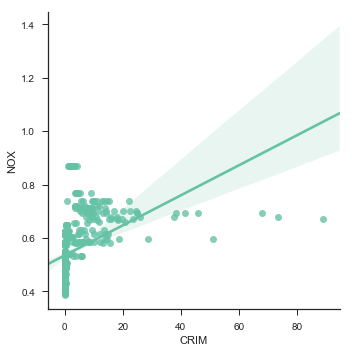

In [40]:
sns.lmplot(x="CRIM", y="NOX", data=boston_df)

You can see from the above that seaborn has plotted a line chart. It also added a regression line to our data so we can see the trend. It looks like there is a positive correlation between CRIM and NOX with some interesting values when CRIM is equal to zero. That may be something to look into.

### Barplots

Barplots can be useful for comparing categories. For example, let's compare the capital gain values across gender.

In [41]:
sns.barplot(train_df.sex, train_df.capitalgain)

NameError: name 'train_df' is not defined

We just pass the full columns to seaborn and by default it will plot the mean value as well as error bars. The error bars are calculated via bootstrapping which randomly resamples our data with replacement. It then draws 95% error bars which are the 95th and 5th percentiles. 

### Plotting distributions

Seaborn has a few ways of plotting distributions. The first is basically a **histogram**:

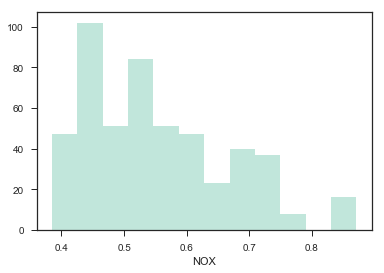

In [42]:
sns.distplot(boston_df.NOX, kde=False)

Histograms just bucketize our data and then plot the number of data points that fall into each bucket. Histograms have a very important parameter - the number of bins. The more bins, the higher variance your plot will have and the less bins the more bias. Be thoughtful when choosing the number of bins as it could change the way you view your data.

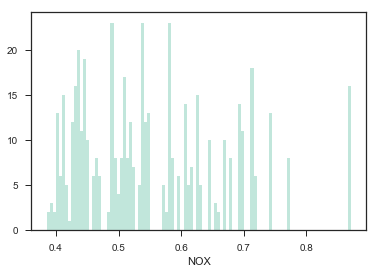

In [43]:
sns.distplot(boston_df.NOX, kde=False, bins=100)

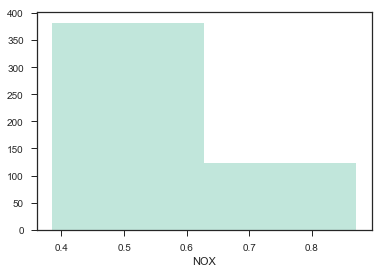

In [44]:
sns.distplot(boston_df.NOX, kde=False, bins=2)

You will notice we have been setting kde=False. With this equal to True, it basically plots the shape of the distribution. We won't go into too much depth, but you can learn more [here](https://seaborn.pydata.org/tutorial/distributions.html).

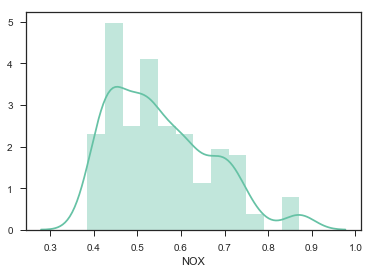

In [45]:
sns.distplot(boston_df.NOX, kde=True)

Seaborn also has a **box plot**. A box plot is a graphical view of summary statistics from a distribution. The middle line is the median, the right side of the box is the 75 percentile and the left side the 25 percentile. The whiskers are the lines that stick out from the box. Usually these extend out 1.5 times the inter-quartile range (IQR) where the IQR is the distance between the 75 and 25 percentile. Any values outside the whiskers are usually shown as dots and as we know could be considered outliers.

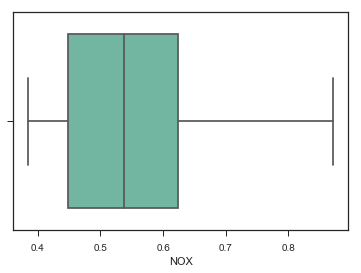

In [46]:
sns.boxplot(boston_df.NOX)

Seaborn has a plot very similar to a box plot called a **violin plot**:

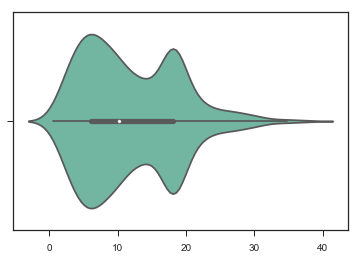

In [47]:
sns.violinplot(boston_df[['INDUS', 'LSTAT']])

Lastly, **joint plots** can plot the distribution of two variables on one plot and also show the scatter plot.

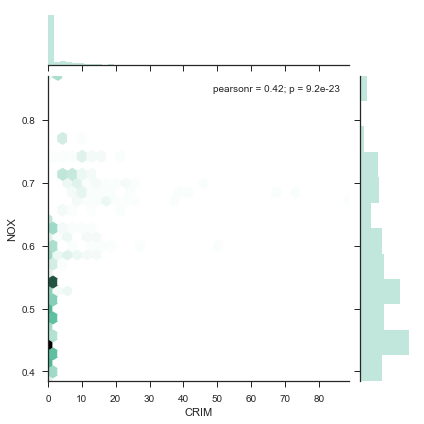

In [48]:
sns.jointplot(boston_df.CRIM, boston_df.NOX, kind="hex")

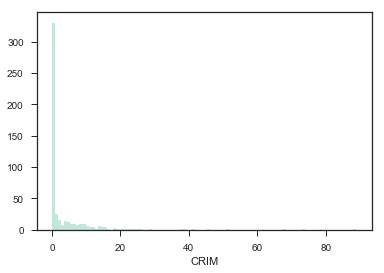

In [49]:
sns.distplot(boston_df.CRIM, bins=100, kde=False)

You can see that a violin plot kind of looks like a box plot, but instead of a box shows the distribution from the KDE.

### Line charts

Line graphs are very useful for showing a value over time - such as a stock's price. Typically one would use a line chart over a scatter plot if there is a connecting component between the values, such as time. Here is an example of a value growing exponentially over time (and since a line chart is pretty simple, we will go to matplotlib):

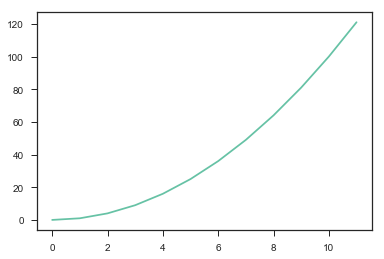

In [50]:
x = range(0, 12)
plt.plot(x, [v**2 for v in x])

### Heat maps

Heat maps are basically a plotted matrix where each value in the matrix is a category. In our example below, a month from a year. Instead of just showing the counts, a heat map colors the matrix to make it easier to see high and low values.

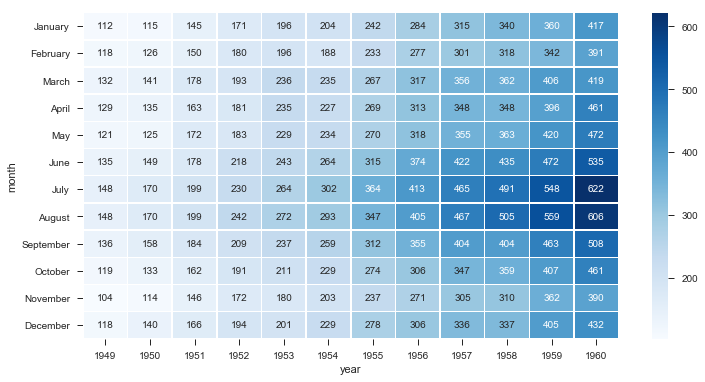

In [51]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='Blues')

Heat maps can also be used to look at the correlations between every combination of variables in your dataset. This can be useful when trying to understand which variables are most related to your target variable when preparing to build a predictive model.

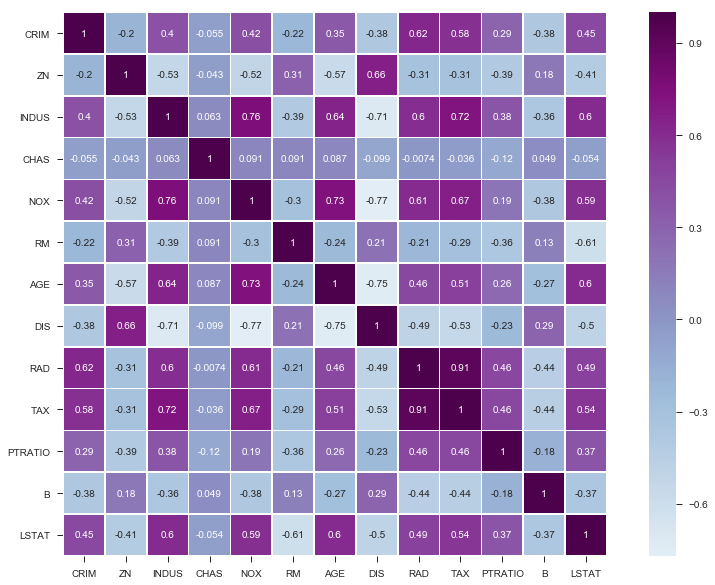

In [5]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(boston_df.corr(), annot = True, cmap = 'BuPu', linecolor = 'white', linewidths = .7, square = True, center = 0)

### Data aware plotting

Seaborn also has some more data aware plotting capabilities:

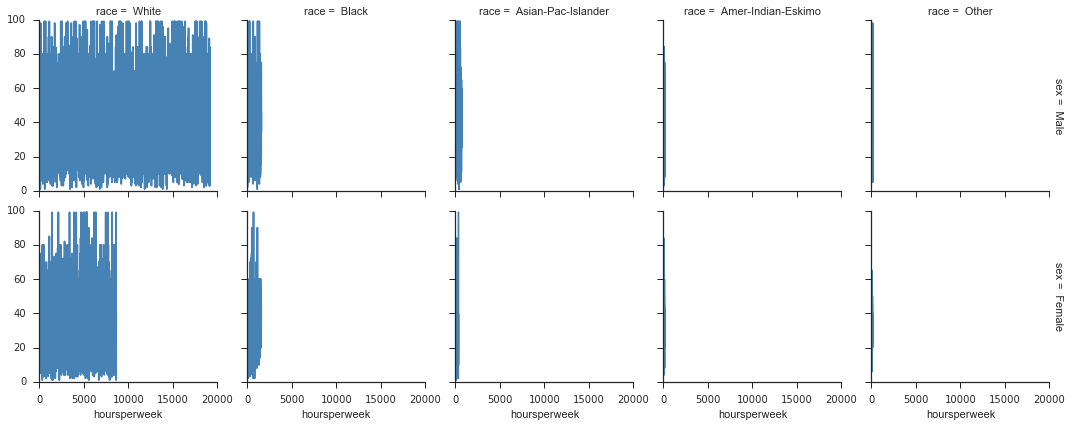

In [136]:
g = sns.FacetGrid(train_df, row="sex", col="race", margin_titles=True)
g.map(plt.plot, "hoursperweek", color="steelblue")

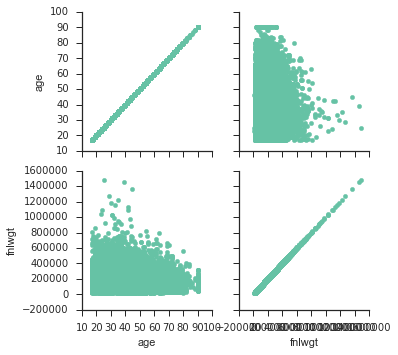

In [130]:
g = sns.PairGrid(train_df[['age', 'fnlwgt']])
g.map(plt.scatter);